In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
pi = np.pi

import matplotlib.pyplot as plt
from matplotlib import patches, rc, rcParams, lines, patheffects
from matplotlib.animation import FuncAnimation
import numpy as np
from tqdm import tqdm
plt.xkcd()
from IPython.display import display, clear_output, Video
from matplotlib.patches import Rectangle

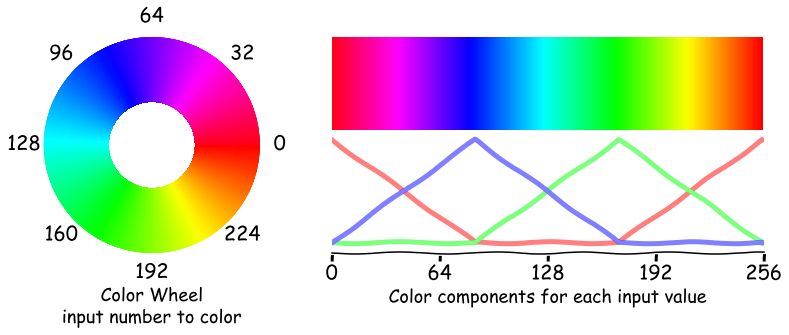

In [18]:
f = plt.figure(figsize=(12,4))
hu = 1/12
vu = 1/4
a = f.add_axes([0.5*hu,0.5*vu,hu*3,vu*3], projection='polar')

norm = mpl.colors.Normalize(0, 255) 

n = 2000
t = np.linspace(0,2*pi,n)
r = np.linspace(.4,1,2)
rg, tg = np.meshgrid(r,t*255/2/pi)
c = tg
im = a.pcolormesh(t, r, c.T,norm=norm,cmap='hsv_r')
a.set_yticklabels([])
a.set_xticklabels([256//8*i for i in range(8)])
a.set_xlabel('Color Wheel\ninput number to color',fontsize=18)
a.tick_params(pad=5,labelsize=20)
a.spines['polar'].set_visible(False)

a1 = f.add_axes([hu*4.5,0.5*vu,hu*6,vu*3])
x = np.linspace(0,255,n)
norm = 3/255
p1 = x<255/3
p2 = (x<2*255/3)&(x>=255/3)
p3 = x>=2*255/3
b = norm*x*p1 + (2-norm*x)*p2
r = (1-norm*x)*p1 + (norm*x-2)*p3
g = (norm*x-1)*p2 + (3-norm*x)*p3
a1.plot(x,r,color='#ff0000',label='red component', lw=5, alpha=0.5)
a1.plot(x,g,color='#00ff00',label='green component', lw=5, alpha=0.5)
a1.plot(x,b,color='#0000ff',label='blue component', lw=5, alpha=0.5)
a1.set_xlabel('Color components for each input value',fontsize=18)
#a1.legend(ncol=1,bbox_to_anchor=(1,1),fontsize=18,loc=2)
r = np.linspace(1.1,2,2)
rg, xg = np.meshgrid(r,x)
c = xg
norm = mpl.colors.Normalize(0, 255) 
im = a1.pcolormesh(x, r, c.T,norm=norm,cmap='hsv_r')
a1.set_xticks([256//4*i for i in range(5)])
a1.tick_params(labelsize=20)
a1.set_yticks([])
a1.spines['right'].set_visible(False)
a1.spines['left'].set_visible(False)
a1.spines['top'].set_visible(False)
f.savefig('colorwheel.png',dpi=300,bbox_inches='tight')

254


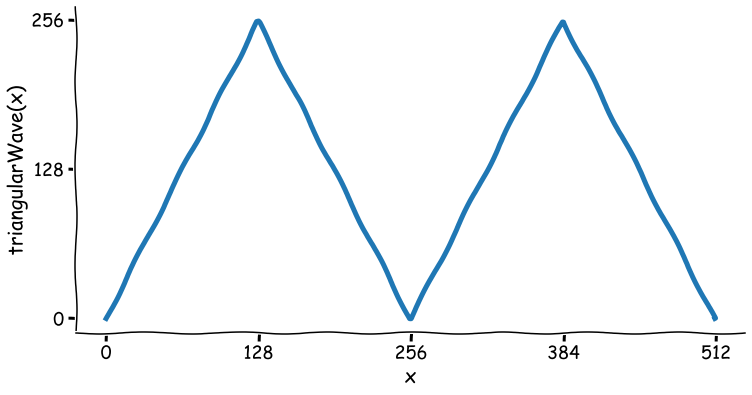

In [16]:
def triangular_wave(x):
    x = x%256
    if x>0x7f:
        return (0xff-x)<<1
    return x<<1
x = np.arange(0,256*2)
y = [triangular_wave(_) for _ in x]
f = plt.figure(figsize=(12,6))
a = f.add_subplot(1,1,1)
a.plot(x,y,lw=5)
a.set_xticks([256*2//4*i for i in range(5)])
a.set_yticks([256//2*i for i in range(3)])
a.tick_params(labelsize=18)
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.set_xlabel('x',fontsize=20)
a.set_ylabel('triangularWave(x)',fontsize=20)
f.savefig('triangular_wave.png',dpi=300)
print(max(y))

252


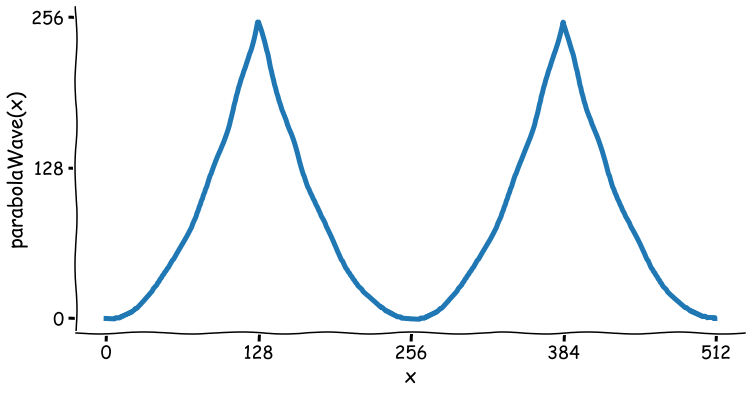

In [15]:
def parabola_wave(x):
    x = x%256
    xm = x;
    if xm>0x7f:
        xm = 0xff-xm
    return (xm*xm)>>6
x = np.arange(0,256*2)
y = [parabola_wave(_) for _ in x]
f = plt.figure(figsize=(12,6))
a = f.add_subplot(1,1,1)
a.plot(x,y,lw=5)
a.set_xticks([256*2//4*i for i in range(5)])
a.set_yticks([256//2*i for i in range(3)])
a.tick_params(labelsize=18)
a.spines['right'].set_visible(False)
a.spines['top'].set_visible(False)
a.set_xlabel('x',fontsize=20)
a.set_ylabel('parabolaWave(x)',fontsize=20)
f.savefig('parabola_wave.png',dpi=300)
print(max(y))